In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
dados = pd.read_csv('dados_produtos.csv')

In [4]:
dados.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [5]:
dicionario = {
    'product_name': 'Produto','rating': 'Avaliação',
    'rating_count': 'Contador de Avaliações','purchased':'Comprou'
}

In [6]:
dados.rename(columns=dicionario,inplace=True)

In [7]:
dados.head()

,Produto,Avaliação,Contador de Avaliações,Comprou
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


<Figure size 1200x600 with 0 Axes>

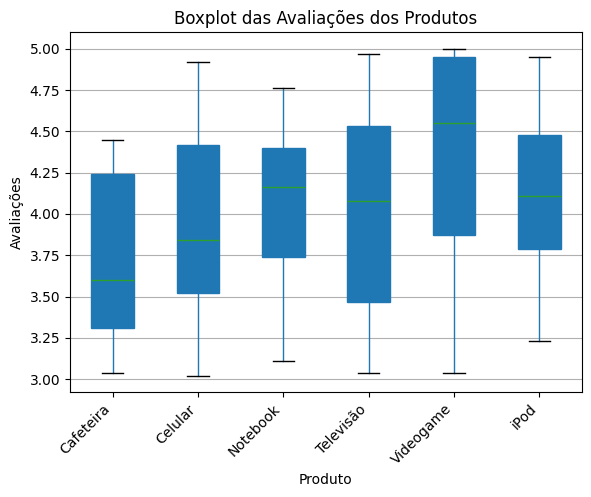

In [8]:
# Criar o boxplot com patch_artist=True para permitir o preenchimento
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
boxplot = dados.boxplot(column='Avaliação', by='Produto', grid=False, patch_artist=True)

# Preencher o interior dos boxplots com a cor azul
for box in boxplot.artists:  
    box.set_facecolor('lightblue')  # Define a cor de preenchimento dos boxplots

# Título e ajustes do gráfico
plt.title('Boxplot das Avaliações dos Produtos')  # Título do gráfico
plt.suptitle('')  # Remove o título automático do boxplot
plt.xlabel('Produto')  # Rótulo do eixo X
plt.ylabel('Avaliações')  # Rótulo do eixo Y
plt.xticks(rotation=45, ha='right')  # Rotaciona os nomes dos produtos para melhor visualização
plt.grid(axis='y')  # Exibe a grade apenas no eixo Y

# Exibir o gráfico
plt.show()

In [9]:
# Dividir o conjunto de dados em variáveis de entrada (X) e saída (y)
X = dados[['Avaliação', 'Contador de Avaliações']]  # Variáveis preditoras (entradas)
y = dados['Comprou']  # Variável alvo (o que queremos prever)

In [10]:
# Dividir os dados (70% treino, 30% teste)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Exibir os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treinamento: {len(x_train)}") #Treino
print(f"Tamanho do conjunto de teste: {len(x_test)}") #Teste

Tamanho do conjunto de treinamento: 70
Tamanho do conjunto de teste: 30


In [12]:
# Modelo da árvore de decisão
modelo = DecisionTreeClassifier() #crio o modelo de árvore de decisão
modelo.fit(x_train,y_train) #treinamento do modelo de árvore de decisão

DecisionTreeClassifier()

In [13]:
# Fazendo previsões com os dados de teste
y_pred = modelo.predict(x_test) 

In [14]:
# Acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)  # Calcula a acurácia com base nas previsões
print(f"Acurácia do modelo: {acuracia}")  # Exibe a acurácia

Acurácia do modelo: 0.5


In [15]:
# Exibir relatório de classificação com mais métricas
print("\nRelatório de Classificação:")  
print(classification_report(y_test, y_pred))  # Exibe aas métricas de desempenho 


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.31      0.56      0.40         9
           1       0.71      0.48      0.57        21

    accuracy                           0.50        30
   macro avg       0.51      0.52      0.49        30
weighted avg       0.59      0.50      0.52        30



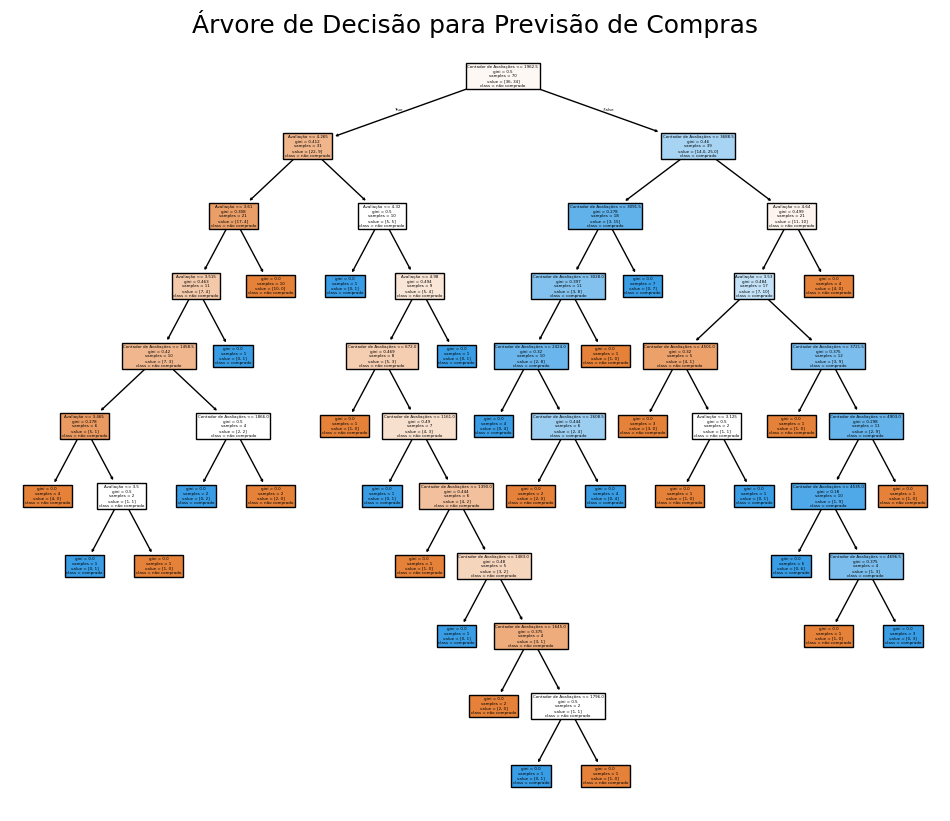

In [17]:
# Visualização da árvore de decisão
plt.figure(figsize=(12, 10))
plot_tree(modelo, feature_names=['Avaliação', 'Contador de Avaliações'], class_names=['não comprado', 'comprado'], filled=True)
plt.title('Árvore de Decisão para Previsão de Compras', fontsize=18)
plt.show()